In [7]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from wordcloud import WordCloud

## Req. 5: Yeni Zelanda için Covid-19 vaka sayıları ile yorum sayıları arasındaki ilşikiyi gösteren grafik

In [8]:
df = pd.read_csv('../dataset/preprocessed_all_countries_combined_comments.csv')

In [9]:
df.head()

,Unnamed: 0,created_utc,date,body,subreddit,income_group,permalink,subjectivity,polarity,label,total_cases,new_cases
0,0,1.643123e+09,2022-01-25,fair I think home citizenship relevant visa tr...,australia,upper,/r/australia/comments/sccs51/visitor_informati...,0.480000,0.360000,positive,2340046.0,52920.0
1,1,1.642923e+09,2022-01-23,I shave business day agree pick directly passp...,australia,upper,/r/australia/comments/sao21y/how_long_does_it_...,0.575000,0.200000,positive,2229104.0,32234.0
2,2,1.642822e+09,2022-01-22,usual mask covid passport event size limit bun...,australia,upper,/r/australia/comments/s9n0mw/who_wants_to_get_...,0.250000,-0.250000,negative,2196870.0,67182.0
3,3,1.642143e+09,2022-01-14,nz citizen live aus fly plenty fly nz passport...,australia,upper,/r/australia/comments/s3h17y/travelling_to_aus...,0.797222,0.559091,positive,1613249.0,86288.0
4,4,1.642146e+09,2022-01-14,need person consent record blur face man trave...,australia,upper,/r/australia/comments/s3lz4w/djokovic_visa_can...,0.000000,0.000000,neutral,1613249.0,86288.0


In [10]:
comment_count = df.loc[(df.subreddit == 'newzealand')].groupby('date').size()

In [11]:
new_cases = df.loc[(df.subreddit == 'newzealand')].groupby('date')['new_cases'].unique()
new_cases_df = new_cases.to_frame(name='new_cases').reset_index()

new_cases_df['new_cases'] = new_cases_df['new_cases'].astype(str)
new_cases_df["new_cases"] = new_cases_df["new_cases"].apply(lambda x: x.replace("[", ""))
new_cases_df["new_cases"] = new_cases_df["new_cases"].apply(lambda x: x.replace(".]", ""))
new_cases_df['new_cases'] = new_cases_df['new_cases'].astype(int)

In [12]:
new_cases_df.head()

,date,new_cases
0,2021-02-20,0
1,2021-02-22,6
2,2021-03-08,4
3,2021-03-09,1
4,2021-03-11,1


In [13]:
comment_count_df = comment_count.to_frame(name='count').reset_index()
comment_count_df = comment_count_df.sort_values(by="date")

comment_count_df['date'] = pd.to_datetime(comment_count_df['date'])

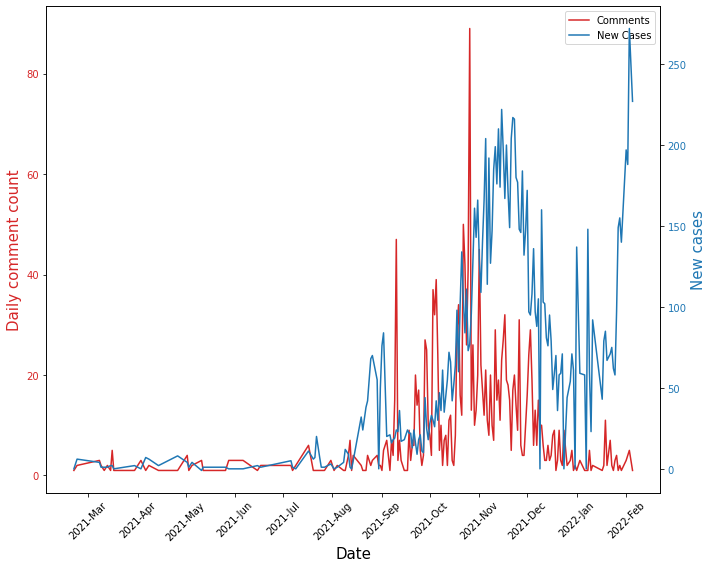

In [14]:
fig, ax1 = plt.subplots(figsize=(10,8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Daily comment count', color=color, fontsize=15)
l1 = ax1.plot(comment_count_df.date, comment_count_df['count'], label='Comments', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))  # '%Y-%b'

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('New cases', color=color, fontsize=15)
l2 = ax2.plot(comment_count_df.date, new_cases_df.new_cases, label='New Cases', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation=45)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

ax1.legend(handles=l1+l2)

fig.tight_layout()
plt.show()

## Req. 9: Pozitif ve negatif yorumların ülkelere göre dağılımı

In [15]:
df_sentiment = df.loc[ (df.label == 'positive') | (df.label =='negative') ]
df_sentiment = df_sentiment.groupby(['subreddit', 'label'])['label'].count().sort_values(ascending=False)
df_sentiment = df_sentiment.to_frame(name='count').unstack()
df_sentiment.columns = df_sentiment.columns.droplevel()

df_sentiment = df_sentiment.reset_index()

In [16]:
df_sentiment = df_sentiment.sort_values(by=['positive'], ascending=False)
df_sentiment.head()

label,subreddit,negative,positive
1,canada,1706,3000
8,newzealand,477,1012
16,unitedkingdom,389,619
0,australia,177,308
4,germany,60,211


Text(0.5, 0, 'Countries')

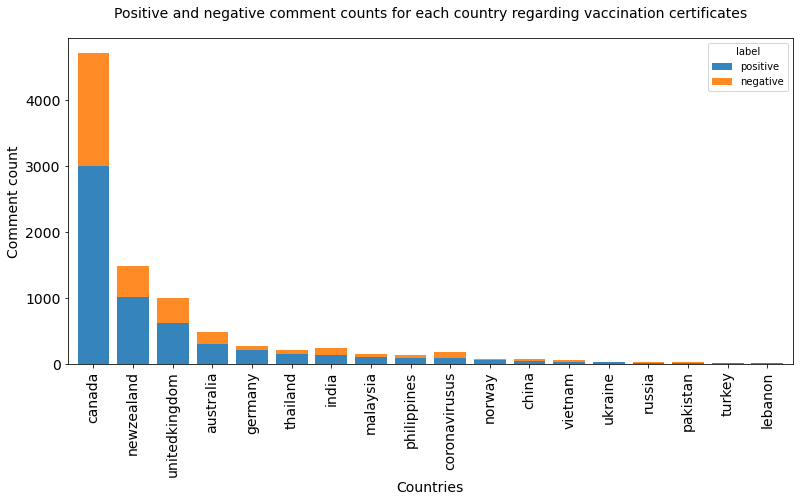

In [17]:
ax = df_sentiment.plot.bar(x='subreddit', y= ['positive', 'negative'],
                      figsize=(13, 6), width=0.8, linewidth=1, stacked=True, alpha=0.9, fontsize=14)

ax.set_title('Positive and negative comment counts for each country regarding vaccination certificates' ,pad=20, fontdict={'fontsize':14});
ax.set_ylabel('Comment count',fontdict={'fontsize':14})
ax.set_xlabel('Countries',fontdict={'fontsize':14})

## Req. 10: Seçilen dört ülke için kelime bulutu

In [18]:
def create_word_cloud(country):
    df_country = df.loc[df.subreddit == country]
    df_country.dropna(inplace=True)
    
    all_comments = ' '.join ( [comments for comments in df_country['body']])
    word_cloud = WordCloud(width=1024, height=768, random_state=21, max_font_size = 120, background_color="white").generate(all_comments)

    plt.figure( figsize=(20, 10) )
    plt.imshow(word_cloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

### 10.1. Yeni Zelanda

<ipython-input-18-fa0e1f0e4694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.dropna(inplace=True)


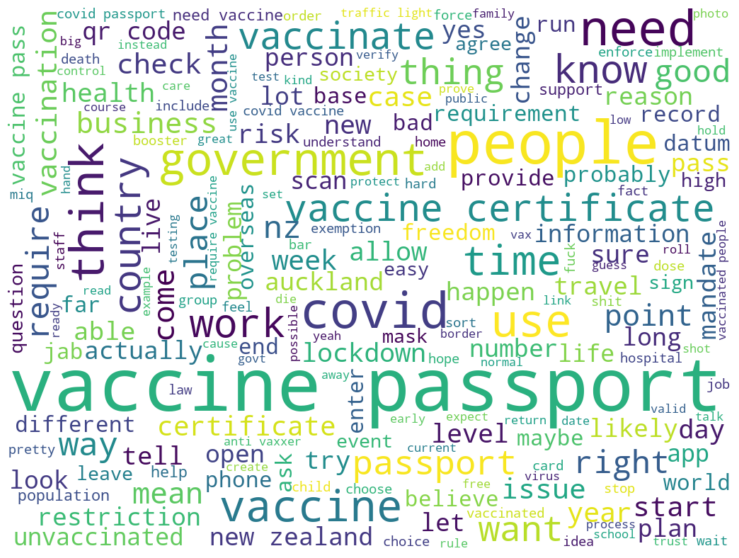

In [19]:
create_word_cloud('newzealand')

### 10.2. Birleşik Krallık

<ipython-input-18-fa0e1f0e4694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.dropna(inplace=True)


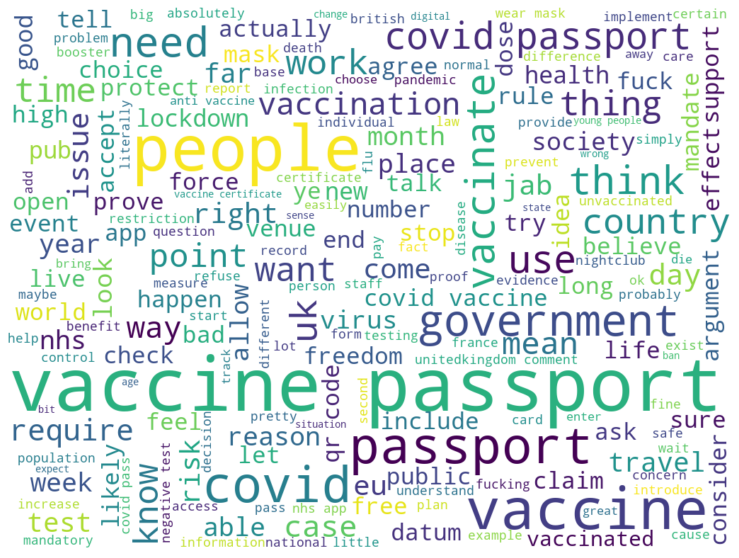

In [20]:
create_word_cloud('unitedkingdom')

### 10.3. Tayland

<ipython-input-18-fa0e1f0e4694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.dropna(inplace=True)


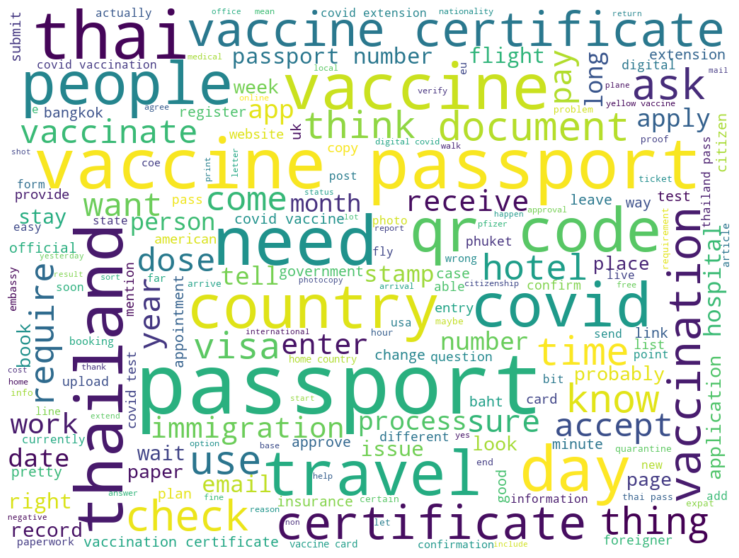

In [21]:
create_word_cloud('thailand')

### 10.4. Hindistan

<ipython-input-18-fa0e1f0e4694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.dropna(inplace=True)


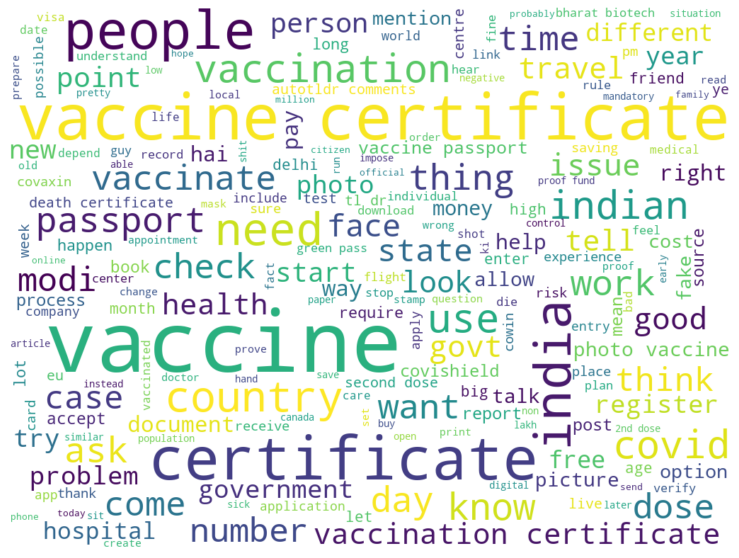

In [22]:
create_word_cloud('india')

### 10.5. Kanada

<ipython-input-18-fa0e1f0e4694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.dropna(inplace=True)


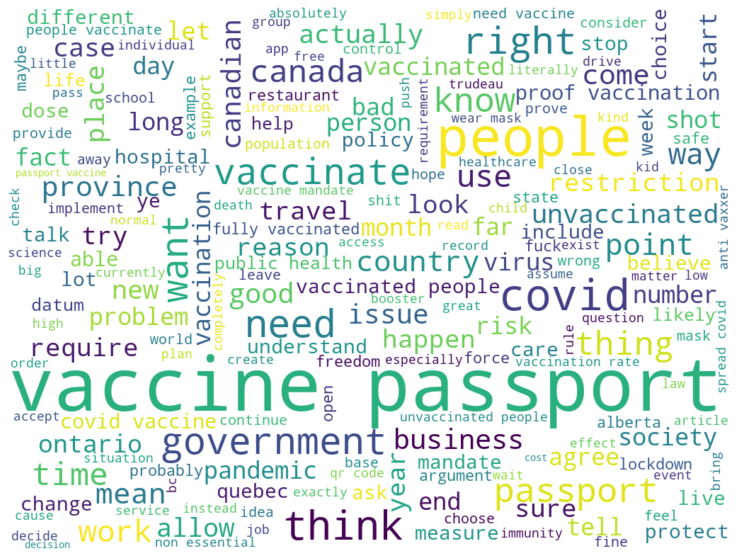

In [23]:
create_word_cloud('canada')

## Req. 6: Günlere göre yeni vaka ve yorumlar arasındaki R Korelasyonu

In [24]:
df_comment_count = df.groupby('date').size()

In [25]:
df_comment_count = df_comment_count.to_frame(name='new_comment_count').reset_index()

In [26]:
df_comment_count.head()

,date,new_comment_count
0,2021-01-11,1
1,2021-01-17,1
2,2021-01-18,1
3,2021-01-20,1
4,2021-01-21,1


In [27]:
groupped_new_cases = df.groupby('date')['new_cases'].unique()

In [28]:
groupped_new_cases

date
2021-01-11                                            [23018.0]
2021-01-17                                             [3339.0]
2021-01-18                                             [3144.0]
2021-01-20                                                [4.0]
2021-01-21                                             [5926.0]
                                    ...                        
2022-02-01         [10697.0, 211277.0, 197.0, 124693.0, 8587.0]
2022-02-02    [24228.0, 15338.0, 238252.0, 188.0, 23299.0, 1...
2022-02-03    [14025.0, 248652.0, 272.0, 29.0, 154643.0, 407...
2022-02-04                [14113.0, 214386.0, 20856.0, 82490.0]
2022-02-05                    [7464.0, 127116.0, 227.0, 7469.0]
Name: new_cases, Length: 349, dtype: object

In [29]:
groupped_new_cases = groupped_new_cases.to_frame(name='total_new_case').reset_index()

In [30]:
# summing total new cases per day for each countries.
groupped_new_cases['total'] = groupped_new_cases.total_new_case.apply(lambda x:int(np.nansum(x)))

In [31]:
groupped_new_cases.head()

,date,total_new_case,total
0,2021-01-11,[23018.0],23018
1,2021-01-17,[3339.0],3339
2,2021-01-18,[3144.0],3144
3,2021-01-20,[4.0],4
4,2021-01-21,[5926.0],5926


In [32]:
# create new df for R corr.
df_for_corr = pd.DataFrame()
df_for_corr['New Cases'] = groupped_new_cases.total
df_for_corr['New Comments'] = df_comment_count.new_comment_count

In [33]:
df_for_corr.head()

,New Cases,New Comments
0,23018,1
1,3339,1
2,3144,1
3,4,1
4,5926,1


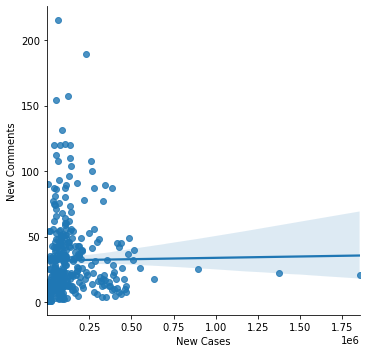

In [34]:
sns.lmplot(x='New Cases', y='New Comments', data=df_for_corr);

>Pearson’s R --> 0.01161<br>
0.8288 --> A p-value. This is the probability that the true value of r is zero (no correlation).<br>
https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

In [35]:
from scipy import stats
stats.pearsonr(df_for_corr['New Cases'], df_for_corr['New Comments'])

(0.011613864653655239, 0.8288366784319494)

## Req. 6: Yeni Zelanda için günlük vaka sayısı ile yorum sayısı arasındaki R korelasyonu

In [36]:
df_comment_count2 =  df.loc[(df.subreddit == 'newzealand')].groupby('date').size()

In [37]:
df_comment_count2

date
2021-02-20    1
2021-02-22    2
2021-03-08    3
2021-03-09    2
2021-03-11    1
             ..
2022-01-29    1
2022-02-01    3
2022-02-02    4
2022-02-03    5
2022-02-05    1
Length: 193, dtype: int64

In [38]:
df_comment_count2 = df_comment_count2.to_frame(name='nz_new_comment_count').reset_index()

In [39]:
df_comment_count2

,date,nz_new_comment_count
0,2021-02-20,1
1,2021-02-22,2
2,2021-03-08,3
3,2021-03-09,2
4,2021-03-11,1
...,...,...
188,2022-01-29,1
189,2022-02-01,3
190,2022-02-02,4
191,2022-02-03,5


In [40]:
groupped_new_cases2 = df.loc[(df.subreddit == 'newzealand')].groupby('date')['new_cases'].unique()

In [41]:
groupped_new_cases2

date
2021-02-20      [0.0]
2021-02-22      [6.0]
2021-03-08      [4.0]
2021-03-09      [1.0]
2021-03-11      [1.0]
               ...   
2022-01-29    [140.0]
2022-02-01    [197.0]
2022-02-02    [188.0]
2022-02-03    [272.0]
2022-02-05    [227.0]
Name: new_cases, Length: 193, dtype: object

In [42]:
groupped_new_cases2 = groupped_new_cases2.to_frame(name='total_new_case').reset_index()

In [43]:
# summing total new cases per day for new zealand.
groupped_new_cases2['total'] = groupped_new_cases2.total_new_case.apply(lambda x:int(np.nansum(x)))

In [44]:
groupped_new_cases2.head()

,date,total_new_case,total
0,2021-02-20,[0.0],0
1,2021-02-22,[6.0],6
2,2021-03-08,[4.0],4
3,2021-03-09,[1.0],1
4,2021-03-11,[1.0],1


In [45]:
# create new df for R corr.
df_for_corr2 = pd.DataFrame()
df_for_corr2['New Cases'] = groupped_new_cases2.total
df_for_corr2['New Comments'] = df_comment_count2.nz_new_comment_count

In [46]:
df_for_corr.head()

,New Cases,New Comments
0,23018,1
1,3339,1
2,3144,1
3,4,1
4,5926,1


In [47]:
from scipy import stats
stats.pearsonr(df_for_corr2['New Cases'], df_for_corr2['New Comments'])

(0.3043673882186473, 1.6813065974210968e-05)

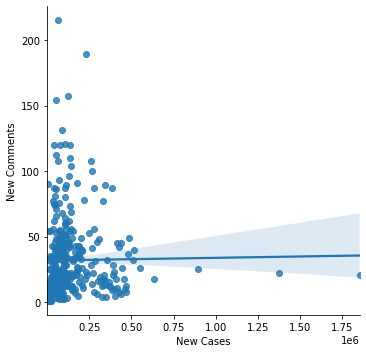

In [48]:
sns.lmplot(x='New Cases', y='New Comments', data=df_for_corr);

>Pearson’s R --> 0.30436<br>
1.6813 --> A p-value. This is the probability that the true value of r is zero (no correlation).<br>
https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

## Req. 11: Zamana bağlı polarity grafiği

In [49]:
df['date'] = pd.to_datetime(df['date'])

Text(0.5, 0, 'Date')

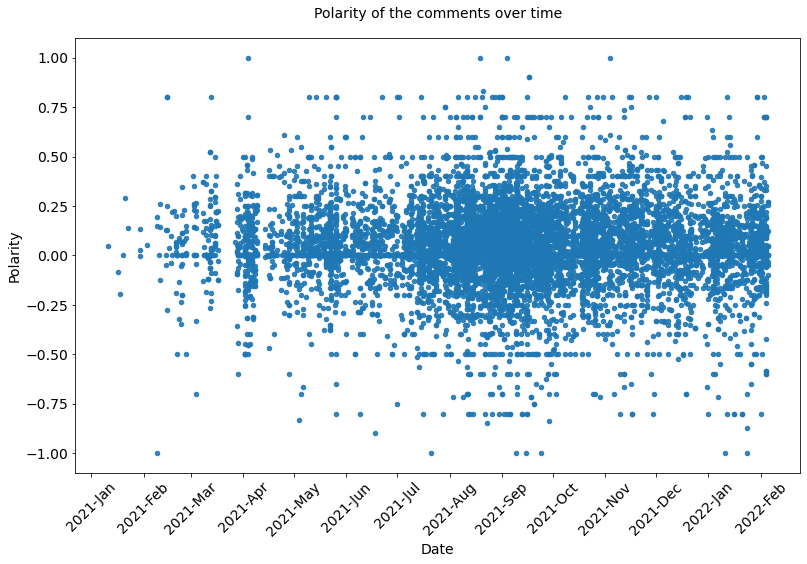

In [50]:
bx = df.plot.scatter(x='date', y= ['polarity'],
                     rot=45, figsize=(13, 8), stacked=True, alpha=0.9, fontsize=14)

bx.xaxis.set_major_locator(mdates.MonthLocator())
bx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))  # '%Y-%b'
bx.set_title('Polarity of the comments over time' ,pad=20, fontdict={'fontsize':14});
bx.set_ylabel('Polarity',fontdict={'fontsize':14})
bx.set_xlabel('Date',fontdict={'fontsize':14})

## Req. 12: Zamana bağlı subjectivity grafiği

Text(0.5, 0, 'Date')

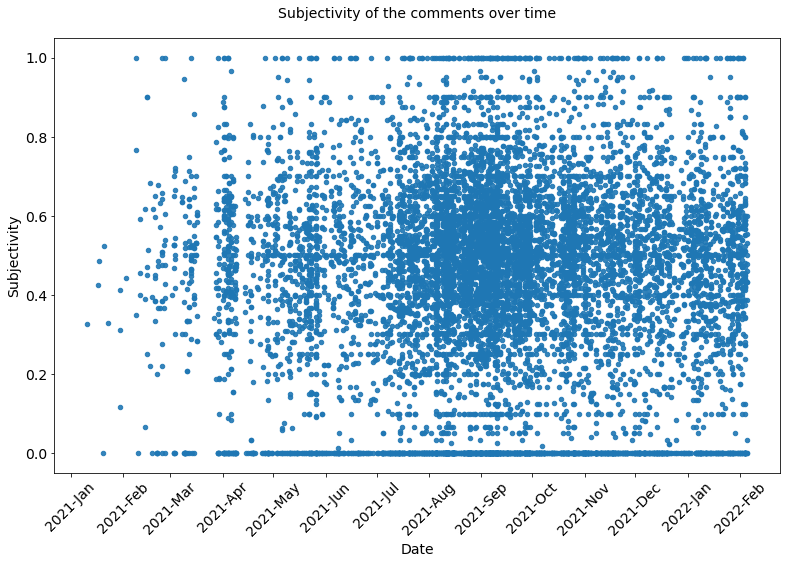

In [51]:
cx = df.plot.scatter(x='date', y= ['subjectivity'],
                     rot=45, figsize=(13, 8), stacked=True, alpha=0.9, fontsize=14)

cx.xaxis.set_major_locator(mdates.MonthLocator())
cx.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
cx.set_title('Subjectivity of the comments over time' ,pad=20, fontdict={'fontsize':14});
cx.set_ylabel('Subjectivity',fontdict={'fontsize':14})
cx.set_xlabel('Date',fontdict={'fontsize':14})